In [1]:
import heapq
import random

def broadcast_message(G, start_node):
    # Priority queue to manage broadcast events, sorted by time
    priority_queue = [(0, start_node, None)]  # (current_time, current_node, source_node)
    visited = set()
    timestamps = {node: {} for node in G}

    while priority_queue:
        current_time, current_node, source_node = heapq.heappop(priority_queue)

        # Record the time the node receives the message from a particular neighbor
        if source_node is not None and current_node not in timestamps[source_node]:
            timestamps[source_node][current_node] = current_time

        if current_node not in visited:
            visited.add(current_node)
            # Process all neighbors
            for neighbor, latency in G[current_node]:
                if neighbor not in visited:
                    event_time = current_time + latency
                    heapq.heappush(priority_queue, (event_time, neighbor, current_node))

    return timestamps

# Example graph with edge latencies
G = {
    0: [(1, 2), (2, 5)],
    1: [(0, 2), (3, 1), (4, 3)],
    2: [(0, 5)],
    3: [(1, 1)],
    4: [(1, 3)]
}

# Randomly select a node
start_node = random.choice(list(G.keys()))

# Simulate the broadcasting
timestamps = broadcast_message(G, start_node)

# Output the timestamps
print("Timestamps when each node received the message from each neighbor:")
for node, times in timestamps.items():
    print(f"Node {node}: {times}")


Timestamps when each node received the message from each neighbor:
Node 0: {2: 7}
Node 1: {3: 1, 0: 2, 4: 3}
Node 2: {}
Node 3: {}
Node 4: {}


torch.Size([10000, 10000])
torch.Size([10000])
already_reshape


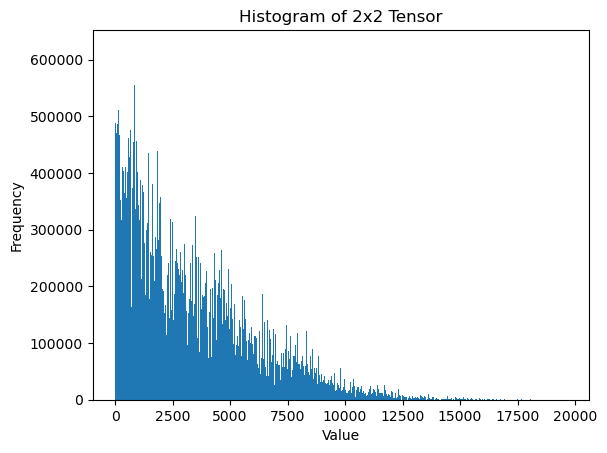

In [2]:
import torch as th
import matplotlib.pyplot as plt
m = 10
n = 10
K = 2
device = th.device("cuda:0")
x = th.zeros(m, n, K).to(device)
dis = th.zeros(m * n, m * n).to(device)

for i in range(m):
    for j in range(n):
        x[i][j][0] = i
        x[i][j][1] = j
x = x.reshape(-1, 2)
cross = x @ x.T
d1 = cross.diagonal()
print(cross.shape)
print(d1.shape)
# assert 0
xx = d1.repeat(m * n, 1)

fincal_dis = xx - 2 * cross + xx.T
# Step 3: Plot the histogram
fincal_dis = fincal_dis.reshape(-1)
# fincal_dis = fincal_dis / fincal_dis.sum()
print("already_reshape")
plt.hist(fincal_dis.cpu().numpy(), bins='auto')
plt.title('Histogram of 2x2 Tensor')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()